# Data Exploration notebook for machine learning BE

Monsieur le sexe et herr Albrecht

## Python imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd

## Loading data

In [3]:
datadir = "./data/"
df1 = pd.read_csv(datadir + "datatest.txt")
df2 = pd.read_csv(datadir + "datatest2.txt")
dft = pd.read_csv(datadir + "datatraining.txt")

## Data shape & content

In [4]:
print(f"Shape of datatest : {df1.shape}")
print(f"{df1.columns.values}\n")

print(f"Shape of datatest2 : {df2.shape}")
print(f"{df2.columns.values}\n")

print(f"Shape of datatraining : {dft.shape}")
print(f"{dft.columns.values}\n")

Shape of datatest : (2665, 7)
['date' 'Temperature' 'Humidity' 'Light' 'CO2' 'HumidityRatio' 'Occupancy']

Shape of datatest2 : (9752, 7)
['date' 'Temperature' 'Humidity' 'Light' 'CO2' 'HumidityRatio' 'Occupancy']

Shape of datatraining : (8143, 7)
['date' 'Temperature' 'Humidity' 'Light' 'CO2' 'HumidityRatio' 'Occupancy']



In [5]:
print(f"Shape of datatest : {df1.dtypes}\n\n")

print(f"Shape of datatest2 : {df2.dtypes}\n\n")

print(f"Shape of datatraining : {dft.dtypes}\n\n")


Shape of datatest : date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object


Shape of datatest2 : date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object


Shape of datatraining : date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object




In [6]:
print(df1.head())

                    date  Temperature  Humidity       Light         CO2  \
140  2015-02-02 14:19:00      23.7000    26.272  585.200000  749.200000   
141  2015-02-02 14:19:59      23.7180    26.290  578.400000  760.400000   
142  2015-02-02 14:21:00      23.7300    26.230  572.666667  769.666667   
143  2015-02-02 14:22:00      23.7225    26.125  493.750000  774.750000   
144  2015-02-02 14:23:00      23.7540    26.200  488.600000  779.000000   

     HumidityRatio  Occupancy  
140       0.004764          1  
141       0.004773          1  
142       0.004765          1  
143       0.004744          1  
144       0.004767          1  


## More detailed contents

In [7]:
# check for none and nans
print("\nFor df1")
for c in df1.columns.values :
    check_nan = df1[c].isnull().values.any()
    print(f"In column {c}\t NaN : {check_nan}".expandtabs(40))

print("\nFor df2")
for c in df2.columns.values :
    check_nan = df2[c].isnull().values.any()
    print(f"In column {c}\t NaN : {check_nan}".expandtabs(40))

print("\nFor dft")
for c in dft.columns.values :
    check_nan = dft[c].isnull().values.any()
    print(f"In column {c}\t NaN : {check_nan}".expandtabs(40))


For df1
In column date                           NaN : False
In column Temperature                    NaN : False
In column Humidity                       NaN : False
In column Light                          NaN : False
In column CO2                            NaN : False
In column HumidityRatio                  NaN : False
In column Occupancy                      NaN : False

For df2
In column date                           NaN : False
In column Temperature                    NaN : False
In column Humidity                       NaN : False
In column Light                          NaN : False
In column CO2                            NaN : False
In column HumidityRatio                  NaN : False
In column Occupancy                      NaN : False

For dft
In column date                           NaN : False
In column Temperature                    NaN : False
In column Humidity                       NaN : False
In column Light                          NaN : False
In column CO2      

Il n'y a aucun Nan ou None, c'est super

In [8]:
# display boxplot of each values

def boxplot_checker(df, column, mini=None, maxi=None):
    color = "dodgerblue"
    if df[column].dtype != np.int64 and df[column].dtype != np.float64 :
        # column is not numeric, can't plot
        return None

    column_array = df[column]
    minarr, maxarr = np.min(column_array), np.max(column_array)

    if mini is None :
        mini = np.min(column_array)
    if maxi is None :
        maxi = np.max(column_array)

    # define legend
    text = f"median is {np.median(column_array)}\nmax is {maxarr}\nmin is {minarr}"

    # plot
    plt.figure()
    plt.text(1.6, (mini+2*maxarr)/3, text, fontsize=11, bbox=dict(facecolor=color, alpha=0.3, edgecolor="black", boxstyle="round,pad=0.5"))
    plt.gca().set_ylim(mini-0.1*abs(mini), maxarr*1.1)
    plt.axhline(mini, color="red", linestyle="--")
    plt.axhline(maxi, color="red", linestyle="--")
    plt.boxplot(column_array, vert=True, widths=0.5, patch_artist=True, boxprops=dict(facecolor=color, color="black"), medianprops=dict(color="black"))
    plt.ylabel(column)
    plt.title(column)
    plt.grid()
    plt.show()


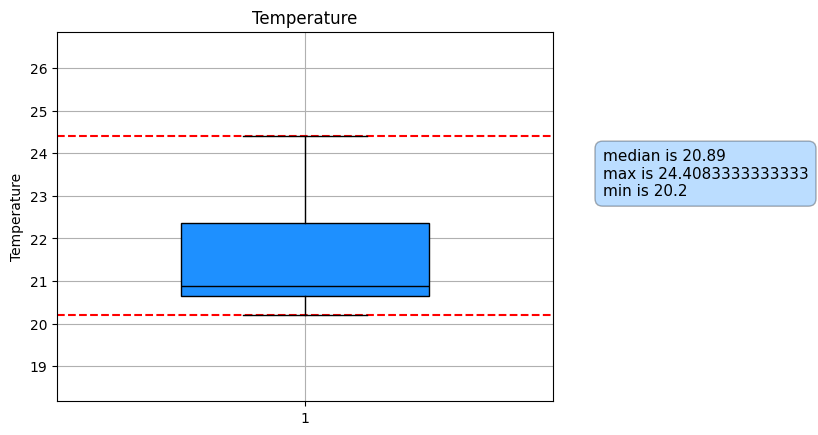

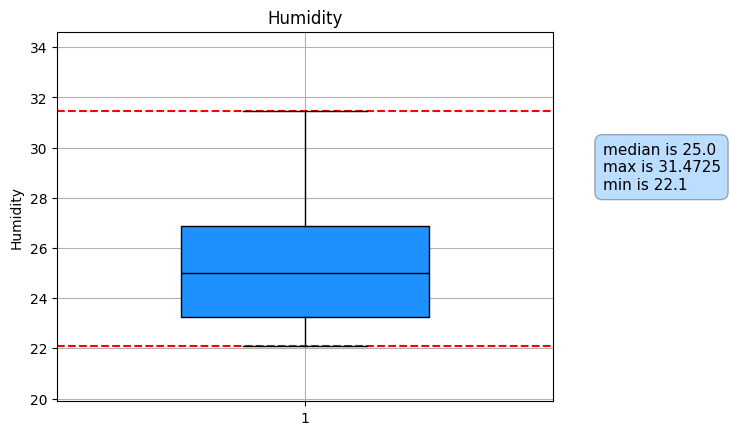

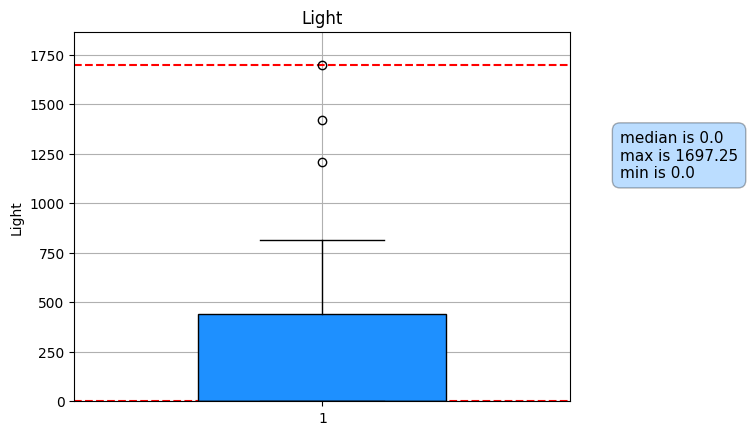

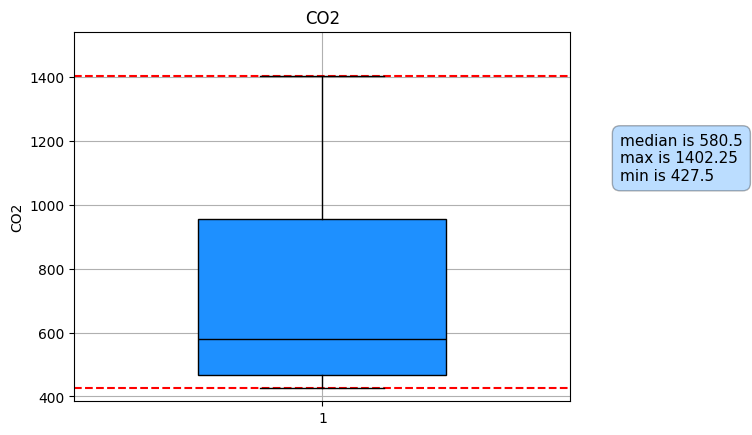

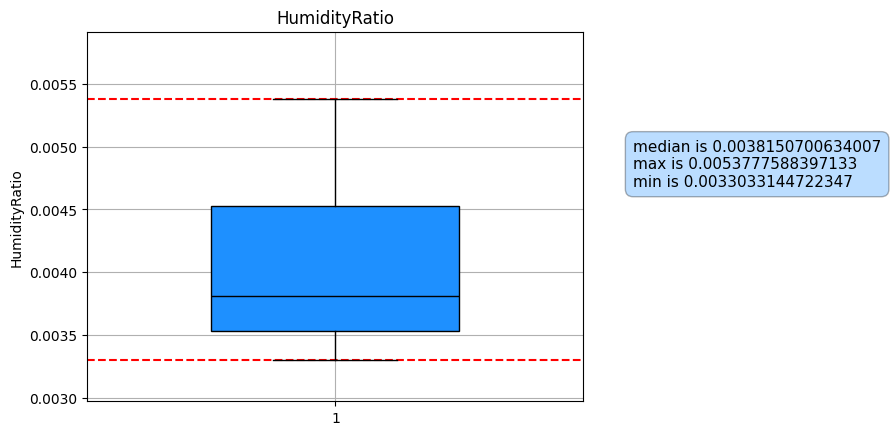

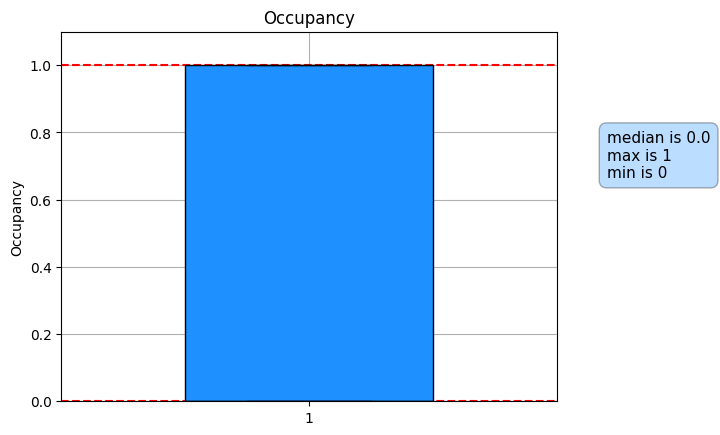

In [9]:

for c in df1.columns.values :
    boxplot_checker(df1, c, mini=None, maxi=None)

Fraction de pièces occupées

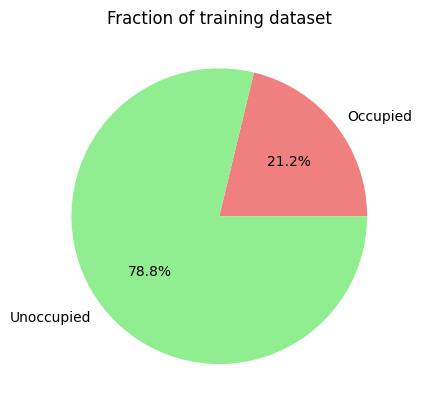

In [10]:
f_occupied = len(dft.loc[dft["Occupancy"] == 1])
f_inoccupied = len(dft.loc[dft["Occupancy"] == 0])

plt.figure()
plt.title("Fraction of training dataset")
plt.pie([f_occupied, f_inoccupied], labels=["Occupied", "Unoccupied"], autopct='%1.1f%%', colors=["lightcoral", "lightgreen"])
plt.show()

Distribution des features selon que la pièce est occupée ou pas

['date' 'Temperature' 'Humidity' 'Light' 'CO2' 'HumidityRatio' 'Occupancy']



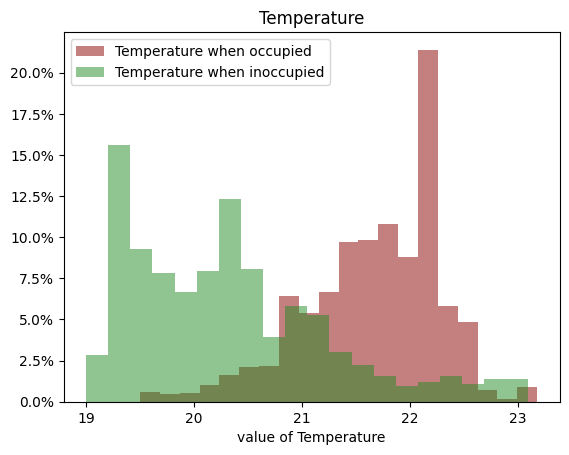

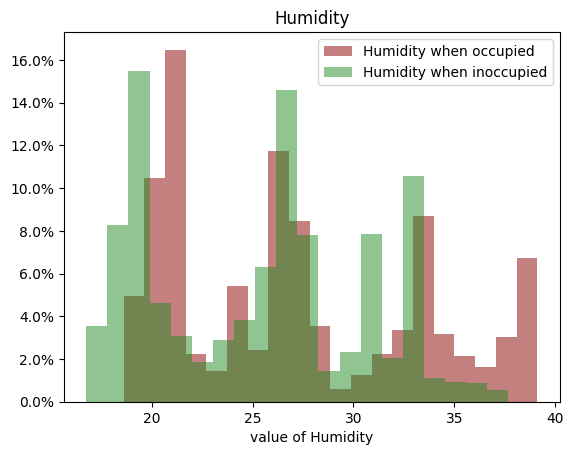

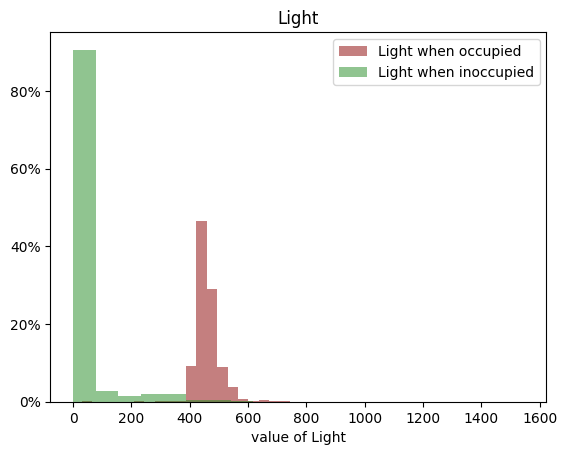

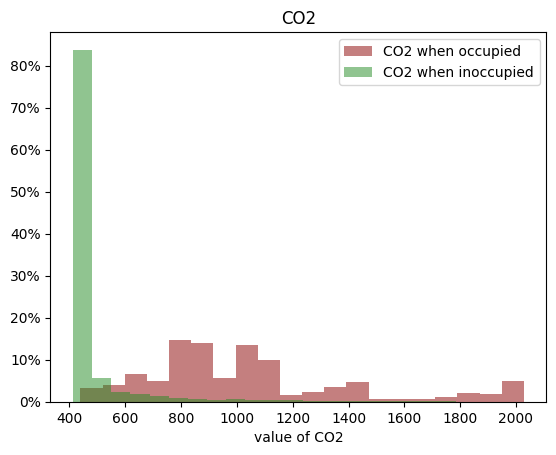

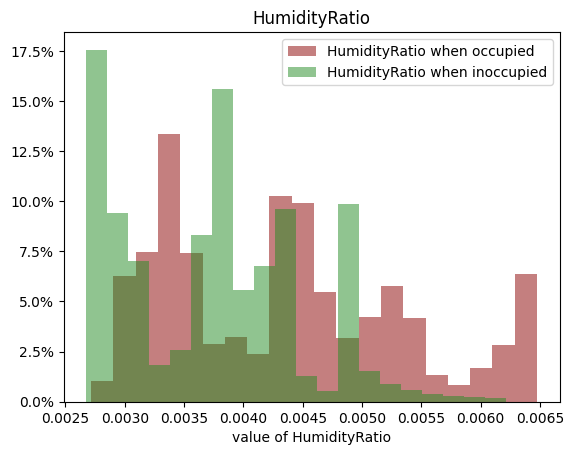

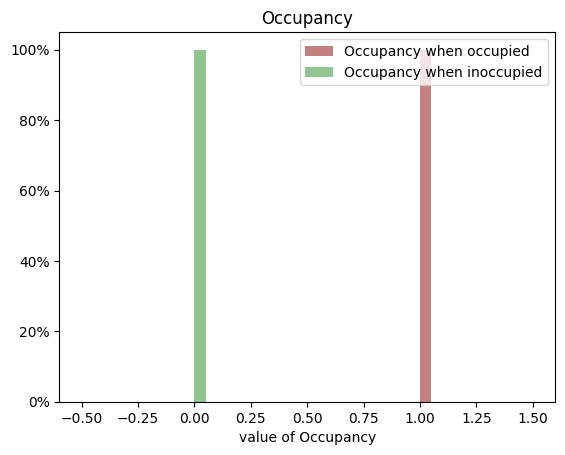

In [11]:
# display relevant variables distribution in case room is occupied or not

print(f"{dft.columns.values}\n")

for col in dft.columns.values[1:] :
    x_occupied = dft.loc[dft["Occupancy"] == 1][col]
    x_inoccupied = dft.loc[dft["Occupancy"] == 0][col]
    plt.figure()
    plt.title(col)
    plt.hist(x_occupied, bins=20, color="darkred", label=f"{col} when occupied", alpha=0.5, weights=np.ones(len(x_occupied)) / len(x_occupied))
    plt.hist(x_inoccupied, bins=20, color="forestgreen", label=f"{col} when inoccupied", alpha=0.5, weights=np.ones(len(x_inoccupied)) / len(x_inoccupied))
    plt.legend()
    plt.xlabel(f"value of {col}")
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.show()

['date' 'Temperature' 'Humidity' 'Light' 'CO2' 'HumidityRatio' 'Occupancy']



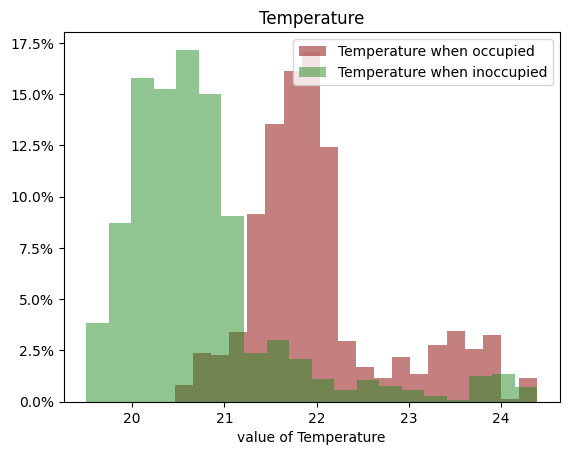

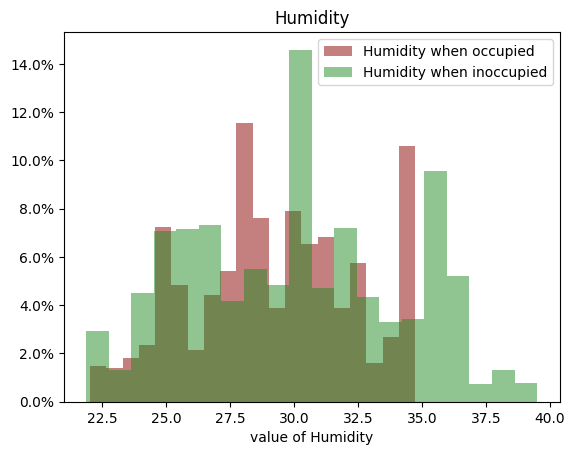

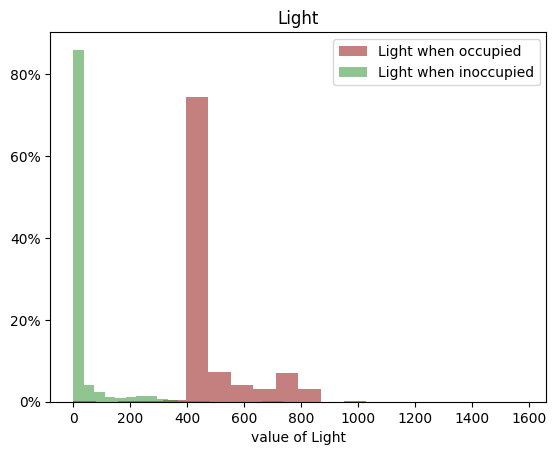

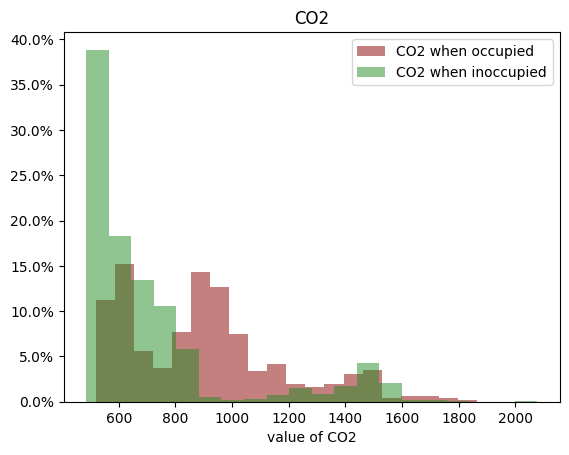

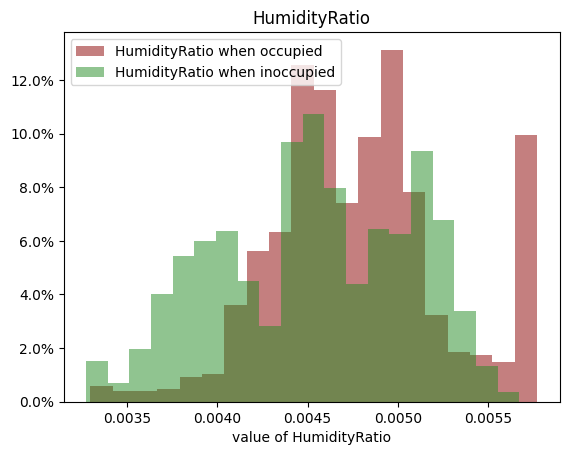

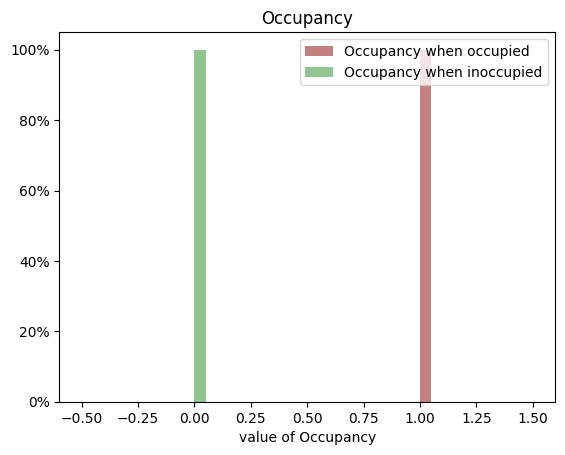

In [12]:
# same for testing set 2
# display relevant variables distribution in case room is occupied or not

print(f"{df2.columns.values}\n")

for col in df2.columns.values[1:] :
    x_occupied = df2.loc[df2["Occupancy"] == 1][col]
    x_inoccupied = df2.loc[df2["Occupancy"] == 0][col]
    plt.figure()
    plt.title(col)
    plt.hist(x_occupied, bins=20, color="darkred", label=f"{col} when occupied", alpha=0.5, weights=np.ones(len(x_occupied)) / len(x_occupied))
    plt.hist(x_inoccupied, bins=20, color="forestgreen", label=f"{col} when inoccupied", alpha=0.5, weights=np.ones(len(x_inoccupied)) / len(x_inoccupied))
    plt.legend()
    plt.xlabel(f"value of {col}")
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.show()

### Clustering
Faut le faire

### PCA
Plot twist, Température, luminosité et CO2

## Corrélation


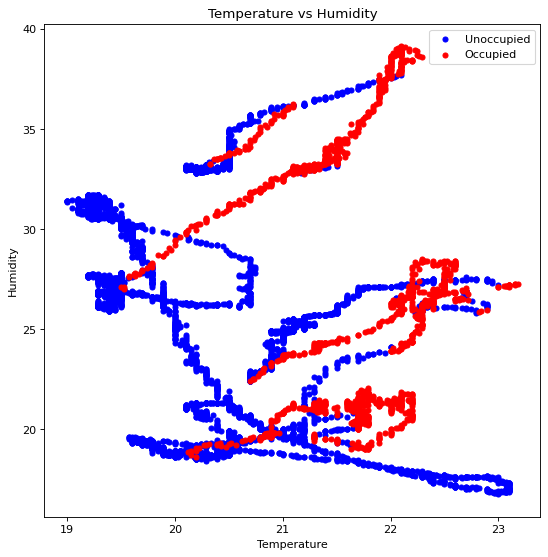

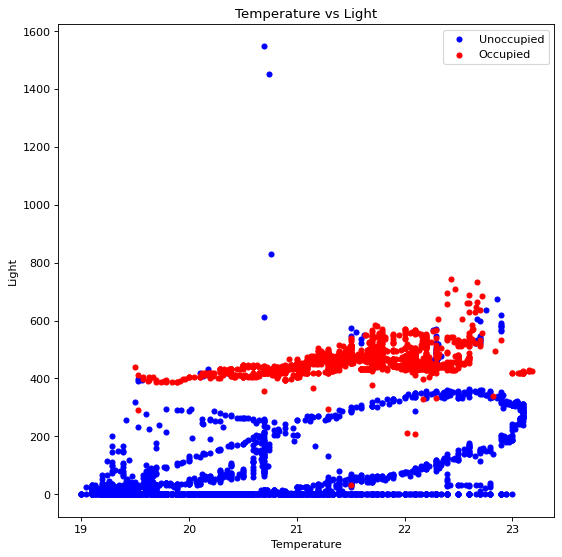

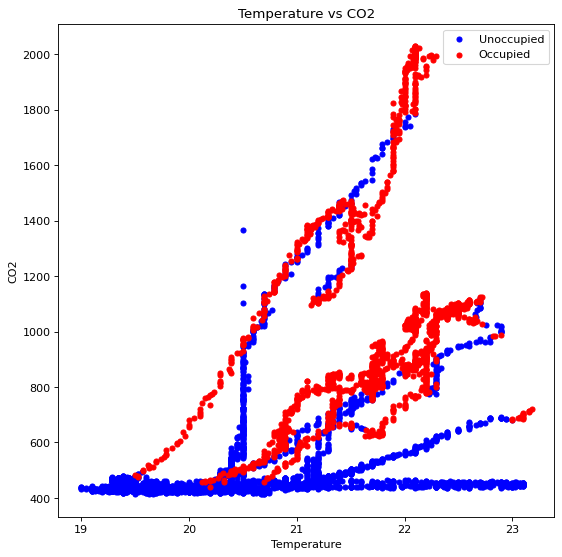

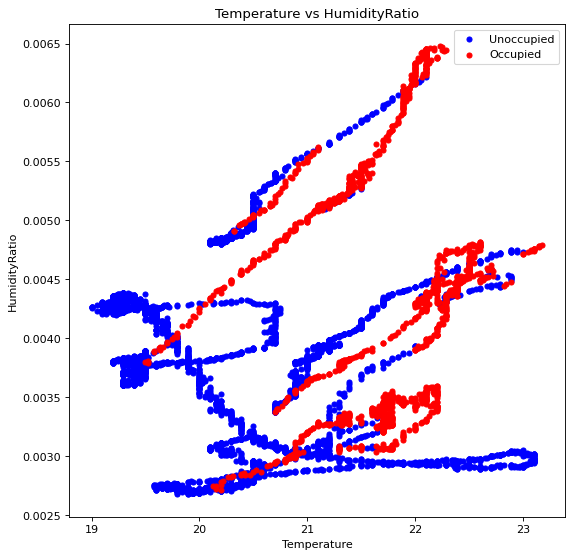

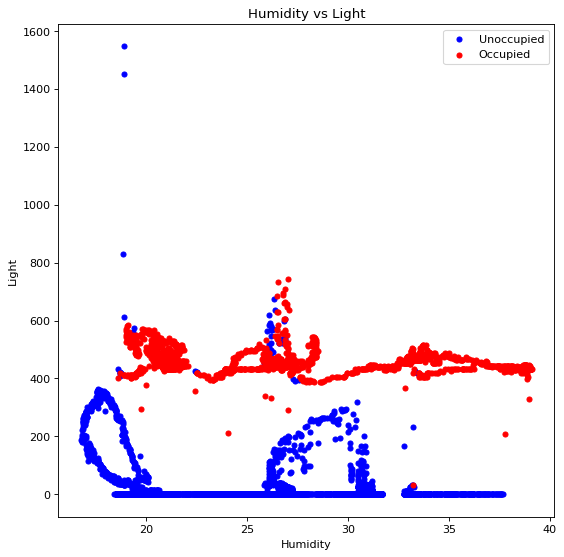

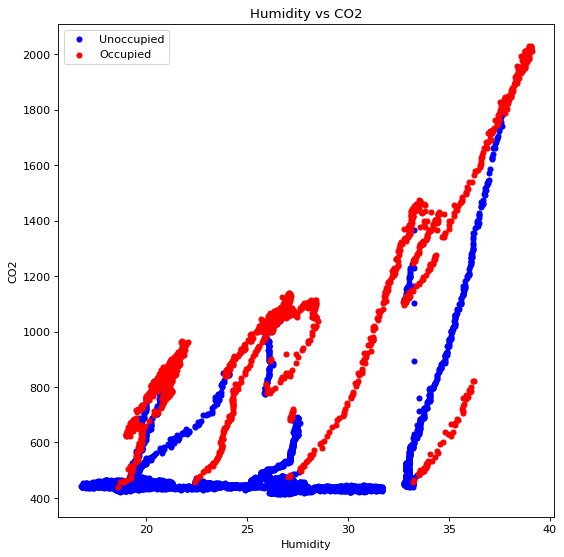

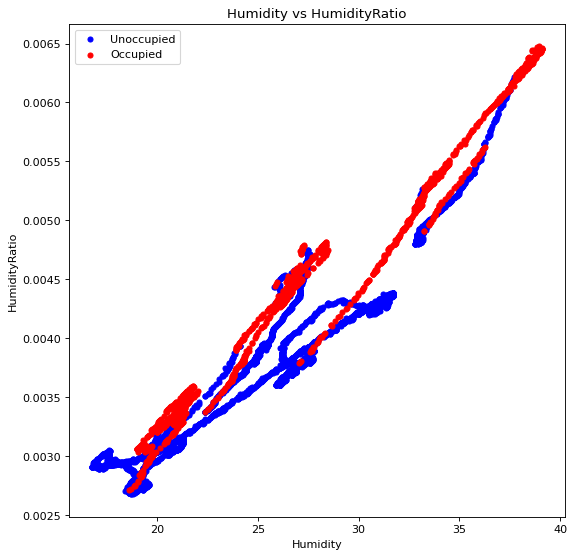

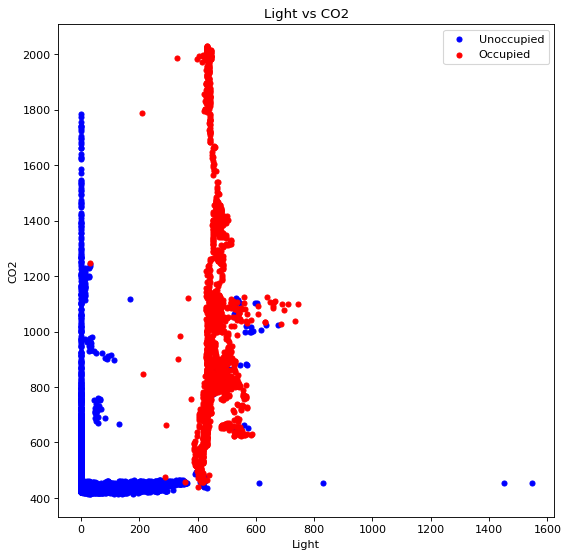

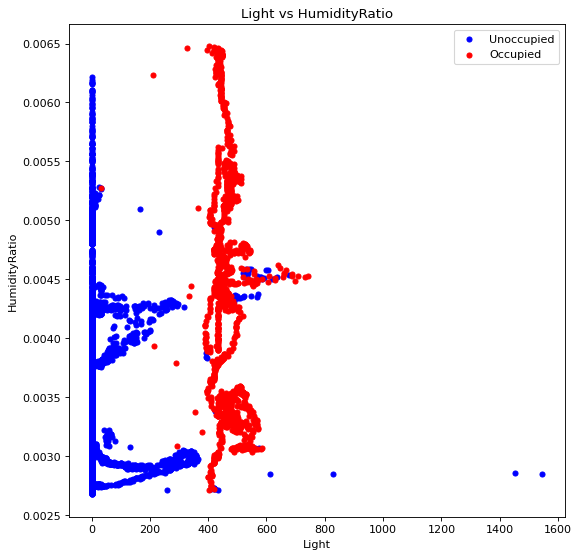

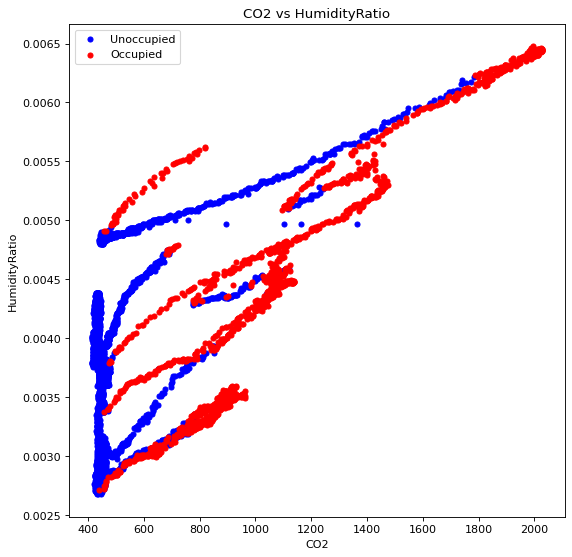

In [13]:
fig_size=(8,8)

# remove date and occupancy
Xcols = dft.columns.values[1:-1]
# create input array
X = dft[Xcols].to_numpy()
# occupancy array
ycol = dft.columns.values[-1]
y = dft[ycol].to_numpy()

Xblue = X[y==0] # innocupied
Xred = X[y==1] # occupied

for i in range(len(Xcols)):
    for j in range(i + 1, len(Xcols)):
        fig = plt.figure(figsize=fig_size, dpi=80, facecolor='w', edgecolor='k')
        plt.scatter(Xblue[:, i], Xblue[:, j], c='b', s=20, label='Unoccupied')
        plt.scatter(Xred[:, i], Xred[:, j], c='r', s=20, label='Occupied');
        plt.xlabel(Xcols[i])
        plt.ylabel(Xcols[j])
        plt.title(f'{Xcols[i]} vs {Xcols[j]}')
        plt.legend()
        plt.show()

Les variables sembent globalement peu corrélée entre elles, hormis l'humidité et le ratio d'humidité (ce qui est cohérent et même rassurant). On peu calculer le coefficient de Pearson pour s'en convaincre.

In [14]:
from scipy.stats import pearsonr

for i in range(len(Xcols)):
    for j in range(i + 1, len(Xcols)):
      pearson, p_value = pearsonr(X[:,i],X[:,j])
      print(f"Le coefficient de Pearson entre {Xcols[i]} et {Xcols[j]} est {pearson:4f}, p_value {p_value:4f} ")

Le coefficient de Pearson entre Temperature et Humidity est -0.141759, p_value 0.000000 
Le coefficient de Pearson entre Temperature et Light est 0.649942, p_value 0.000000 
Le coefficient de Pearson entre Temperature et CO2 est 0.559894, p_value 0.000000 
Le coefficient de Pearson entre Temperature et HumidityRatio est 0.151762, p_value 0.000000 
Le coefficient de Pearson entre Humidity et Light est 0.037828, p_value 0.000640 
Le coefficient de Pearson entre Humidity et CO2 est 0.439023, p_value 0.000000 
Le coefficient de Pearson entre Humidity et HumidityRatio est 0.955198, p_value 0.000000 
Le coefficient de Pearson entre Light et CO2 est 0.664022, p_value 0.000000 
Le coefficient de Pearson entre Light et HumidityRatio est 0.230420, p_value 0.000000 
Le coefficient de Pearson entre CO2 et HumidityRatio est 0.626556, p_value 0.000000 
